# Assignment A1 Jupyter Notebooks

## 1. Markdown

### 1a. Univariate Normal Probability Distribution Function (PDF)

The **univariate normal probability distribution function** describes the probability density of a random variable $X$ that follows a normal (Gaussian) distribution. The PDF is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Where:
- $\mu$: Mean of the distribution
- $\sigma^2$: Variance of the distribution
- $\sigma$: Standard deviation of the distribution
- $x$: Value of the random variable

The function is bell-shaped, symmetric about the mean $\mu$, and its total area under the curve integrates to 1.

### 1b. Joint Probability of Independent Random Variables

If $X_1, X_2, \ldots, X_n$ are **independent random variables** that each follow a normal distribution with the same mean $\mu$ and variance $\sigma^2$, the joint probability density function is the product of the individual univariate PDFs. 

This is due to the independence property, which states that for independent random variables:

$$
f_{X_1, X_2, \ldots, X_n}(x_1, x_2, \ldots, x_n) = \prod_{i=1}^n f_{X_i}(x_i)
$$

Substituting the PDF of the normal distribution for each random variable $X_i$, we get:

$$
f_{X_1, X_2, \ldots, X_n}(x_1, x_2, \ldots, x_n) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

Simplifying:

$$
f_{X_1, X_2, \ldots, X_n}(x_1, x_2, \ldots, x_n) = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\right)
$$

This result shows that the joint probability density is the product of the individual densities, reflecting the independence of the random variables.



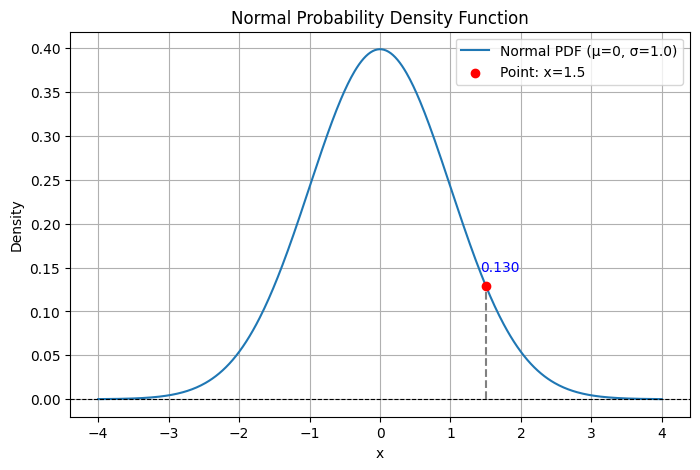

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the normal probability density function
def g(x, μ=0, σ=1.0):
    return (1 / (np.sqrt(2 * np.pi) * σ)) * np.exp(-((x - μ) ** 2) / (2 * σ ** 2))

# Function to plot the normal distribution PDF
def plot_normal_pdf(μ=0, σ=1.0, x_range=None, point=None):
    """
    Plots the normal PDF with overlays for a given point and annotation.
    
    Parameters:
        μ (float): Mean of the normal distribution.
        σ (float): Standard deviation of the normal distribution.
        x_range (tuple): Range for x-axis relative to the mean (default: μ ± 4σ).
        point (float): Specific x-coordinate to annotate on the plot.
    """
    if x_range is None:
        x_range = (μ - 4 * σ, μ + 4 * σ)  # Default range: mean ± 4σ
    
    # Generate x values and compute the PDF
    x_values = np.linspace(x_range[0], x_range[1], 500)
    y_values = g(x_values, μ=μ, σ=σ)
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, label=f"Normal PDF (μ={μ}, σ={σ})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Normal Probability Density Function")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Add x-axis
    
    # Add point and annotation if specified
    if point is not None:
        point_likelihood = g(point, μ=μ, σ=σ)
        plt.scatter([point], [point_likelihood], color="red", zorder=5, label=f"Point: x={point}")
        plt.plot([point, point], [0, point_likelihood], color="gray", linestyle="--", zorder=4)
        plt.annotate(
            f"{point_likelihood:.3f}",
            (point, point_likelihood),
            textcoords="offset points",
            xytext=(10, 10),
            ha="center",
            color="blue"
        )
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_normal_pdf(μ=0, σ=1.0, point=1.5)  # Plot with default μ=0, σ=1, and a point at x=1.5
